In [1]:
from bs4 import BeautifulSoup
import requests
import json
from html.parser import HTMLParser
import urllib.request
import string
import random
import re
import pandas as pd

In [3]:
#Need a JS enabled web service
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
import selenium.webdriver.chrome.service as service
from selenium.webdriver.chrome.options import Options
import time

In [4]:
options = Options()

In [5]:
options.add_argument("--disable-notifications")

In [6]:
driver = webdriver.Chrome('/Users/michaelbrink/Desktop/Scraping 2/chromedriver',options=options)

In [7]:
URL = "https://fortune.com/fortune500/2020/search/"
driver.get(URL)
content = BeautifulSoup(driver.page_source, 'html.parser')
time.sleep(10) #bypass cloudflare

# IGNORE

In [141]:
#changes to x # entires/page
driver.find_element_by_xpath("//select[@aria-label='rows per page']/option[@value='100']").click()

In [46]:
#Pick year
#after each year, rows default to 10, so need to rerun rows=100 everytime.
driver.find_element_by_link_text('2017').click()

In [153]:
#actions = ActionChains(driver)

In [8]:
def ceoFounder():
    driver.find_element_by_xpath(
        "//div[@class='input__inputWrapper--3SQdx searchFilters__filter--3igRc input__input--34yMC input__checkbox--1434-']/label[@for='ceofounder']").click()
    time.sleep(5)

In [9]:
def changeTheWorld():
    driver.find_element_by_xpath(
        "//div[@class='input__inputWrapper--3SQdx searchFilters__filter--3igRc input__input--34yMC input__checkbox--1434-']/label[@for='change-the-world-y-n']").click()
    time.sleep(5)

In [10]:
def femaleCEO():
    driver.find_element_by_xpath(
        "//div[@class='input__inputWrapper--3SQdx searchFilters__filter--3igRc input__input--34yMC input__checkbox--1434-']/label[@for='ceowoman']").click()
    time.sleep(5)

In [13]:
def pageTurner():
    driver.find_element_by_xpath("//div[@class='-next']").click()

In [133]:
'''def pageTurner(n):
    inputElement = driver.find_element_by_xpath("//div[@class='-pageJump']/input[@aria-label='jump to page']")
    inputElement.clear()
    inputElement.send_keys(str(n))
    actions.send_keys_to_element(element=inputElement).perform()
    driver.find_element_by_xpath("/div[@class='searchWrapper__content--3nwCz']").click()
    time.sleep (3) #allow a small time lapse to update'''

'def pageTurner(n):\n    inputElement = driver.find_element_by_xpath("//div[@class=\'-pageJump\']/input[@aria-label=\'jump to page\']")\n    inputElement.clear()\n    inputElement.send_keys(str(n))\n    actions.send_keys_to_element(element=inputElement).perform()\n    driver.find_element_by_xpath("/div[@class=\'searchWrapper__content--3nwCz\']").click()\n    time.sleep (3) #allow a small time lapse to update'

In [138]:
pageTurner()

## Scrape rows

In [42]:
#Fetch a table or table element (row, column)
content = BeautifulSoup(driver.page_source, 'html.parser')

In [59]:
example = content.findAll('a', attrs={'class':'searchResults__cellWrapper--39MAj'})

In [64]:
example = [item.text for item in example] #return a list of all singular elements

In [14]:
def contentScraper():
    content = BeautifulSoup(driver.page_source, 'html.parser')
    example = content.findAll('a', attrs={'class':'searchResults__cellWrapper--39MAj'})
    example = [item.text for item in example] #return a list of all singular elements
    example = [example[i:i + 11] for i in range(0, len(example), 11)]
    return(example)

## Creating a nested frame of data

In [75]:
#Creates a nested list of each 11 row items per company
example = [example[i:i + 11] for i in range(0, len(example), 11)]

## Function to automate all operations

In [16]:
#date range = 1996 - 2020
#row range = 10 - 100
#page range = 1 - 10

#Experiment 1: No filters

outputContent = []

## Pilot model
for year in range(2017, 2021):
    
    URL = "https://fortune.com/fortune500/"+str(year)+"/search/"
    driver.get(URL)
    #increment/update the year
    #driver.find_element_by_link_text(str(year)).click()
    time.sleep(10)
    print ("Year " + str(year) + " active!")
    
    ##Set any desired filters
    #ceoFounder()
    #femalFounder()
    #changeTheworld()
    
    time.sleep(2)
    
    #expand rows to maximum
    driver.find_element_by_xpath("//select[@aria-label='rows per page']/option[@value='100']").click()
    print ("Rows extended")
    time.sleep(5)
    
    for page in range (1, 11):
        
        outputContent.append((year, contentScraper()))
        print("Page " + str(page) + " completed")

        #increment/update the page
        pageTurner()
        time.sleep(2)
        
    print ("Year " + str(year) + " completed")

Year 2017 active!
Rows extended
Page 1 completed
Page 2 completed
Page 3 completed
Page 4 completed
Page 5 completed
Page 6 completed


KeyboardInterrupt: 

In [242]:
#outputContent[x][y][z]

#[x] === tuple in list i.e. year for each of 10 pages
#[y] === tuple element

#SO...

#x ranges from 20 - 59 (30 pages in total)
#y ranges from 0 -1 (first or second tuple element where first is the year second is the row data)
#z ranges from 0 -99 (100 rows per page in total)

In [241]:
#outputContent[20:59] #range from 2017 - 2020 with alt least 11 columns per row/company

## Convert nested list to dataframe

In [4]:
import pandas as pd

In [337]:
#create a datadrame by merging rows onto a dataframe with the same headers

In [85]:
temp = []

In [93]:
#temp = outputContent

In [172]:
columns =['Rank',
             'Name',
             'Revenue ($M)',
             'Revenue % change', 
             'Profit ($M)',
             'Profit % change',
             'Assets ($M)',
             'Market Value ($M)',
             'Employees',
             'Change in rank (1000)',
             'Change in rank (500)',
             'Year']

In [173]:
df = pd.DataFrame(columns=columns)

In [136]:
##TO DELETE EVERY nth ITEM in a LIST
counter=0
for i in range(0, 40):
    for j in range (0, 100):
        del outputContent[i][1][j][11-1::11]
        counter += 1

In [178]:
outputContent[0][1][0][0:12]

['1',
 'Walmart',
 '$485,873',
 '0.8%',
 '$13,643',
 '-7.2%',
 '$198,825',
 '$218,619',
 '2,300,000',
 '-',
 '-',
 2017]

In [179]:
counter=0
for i in range(0, 40):
    for j in range (0, 100):
        
        #if len(outputContent[i][1][j]) < 12:
            #outputContent[i][1][j].append(outputContent[i][0])
        df.loc[counter] = outputContent[i][1][j][0:12]
        counter += 1

In [181]:
import openpyxl

In [189]:
#df.to_excel("forbes2017-2020.xlsx")  

# Import and continue

In [18]:
import pandas as pd

In [19]:
df = pd.read_excel('forbes2017-2020.xlsx')

## Data Cleaning

In [6]:
df.iloc[1001:1300]

,Rank,Name,Revenue ($M),Revenue % change,Profit ($M),Profit % change,Assets ($M),Market Value ($M),Employees,Change in rank (1000),Change in rank (500),Year
1001,2,Exxon Mobil,"$244,363.00",17.4%,"$19,710.00",151.4%,"$348,691.00","$316,157.10",2,"71,200",2,2018
1002,3,Berkshire Hathaway,"$242,137.00",8.3%,"$44,940.00",86.7%,"$702,095.00","$492,008.40",-1,"377,000",-1,2018
1003,4,Apple,"$229,234.00",6.3%,"$48,351.00",5.8%,"$375,319.00","$851,317.90",-1,"123,000",-1,2018
1004,5,UnitedHealth Group,"$201,159.00",8.8%,"$10,558.00",50.5%,"$139,058.00","$207,079.90",1,"260,000",1,2018
1005,6,McKesson,"$198,533.00",3.1%,"$5,070.00",124.5%,"$60,969.00","$29,067.00",-1,"64,500",-1,2018
1006,7,CVS Health,"$184,765.00",4.1%,"$6,622.00",24.5%,"$95,131.00","$63,114.00",-,"203,000",-,2018
1007,8,Amazon.com,"$177,866.00",30.8%,"$3,033.00",27.9%,"$131,310.00","$700,667.70",4,"566,000",4,2018
1008,9,AT&T,"$160,546.00",-2%,"$29,450.00",127%,"$444,097.00","$218,945.60",-,"254,000",-,2018
1009,10,General Motors,"$157,311.00",-5.5%,"$-3,864.00",-141%,"$212,482.00","$50,971.60",-2,"180,000",-2,2018
1010,11,Ford Motor,"$156,776.00",3.3%,"$7,602.00",65.4%,"$257,808.00","$44,244.30",-1,"202,000",-1,2018


In [20]:
import copy #don't point, make a copy!

In [21]:
temp_emp = copy.copy(df[1000:]['Change in rank (1000)'])

In [22]:
temp_change1000 = copy.copy(df[1000:]['Employees'])

In [23]:
df[1000:]['Employees'] = temp_emp
df[1000:]['Change in rank (1000)'] = temp_change1000

/Users/michaelbrink/anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/michaelbrink/anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
df['Revenue % change'] = df['Revenue % change'].replace('[\%,]', '', regex=True)
df['Revenue % change'] = pd.to_numeric(df['Revenue % change'],errors='coerce').fillna('')

In [25]:
df[df.columns[4]] = df[df.columns[4]].replace('[\$,]', '', regex=True)
df[df.columns[4]] = pd.to_numeric(df[df.columns[4]],errors='coerce').fillna('')

df[df.columns[7]] = df[df.columns[7]].replace('[\$,]', '', regex=True)
df[df.columns[7]] = pd.to_numeric(df[df.columns[7]],errors='coerce').fillna('')

In [26]:
#currency fields
df[df.columns[2]] = df[df.columns[2]].replace('[\$,]', '', regex=True).astype(float)
#df[df.columns[4]] = df[df.columns[4]].replace('[\$,]', '', regex=True).astype(float) #issue
df[df.columns[6]] = df[df.columns[6]].replace('[\$,]', '', regex=True).astype(float)
#df[df.columns[7]] = df[df.columns[7]].replace('[\$,]', '', regex=True).astype(float) #issue

In [27]:
df[df['Year'] == 2018].head(3)

,Rank,Name,Revenue ($M),Revenue % change,Profit ($M),Profit % change,Assets ($M),Market Value ($M),Employees,Change in rank (1000),Change in rank (500),Year
1000,1,Walmart,500343.0,3,9862,-27.7%,204522.0,263563,"2,300,000",-,-,2018
1001,2,Exxon Mobil,244363.0,17.4,19710,151.4%,348691.0,316157,"71,200",2,2,2018
1002,3,Berkshire Hathaway,242137.0,8.3,44940,86.7%,702095.0,492008,"377,000",-1,-1,2018


In [28]:
#employees
df['Employees'] = df['Employees'].replace('[,]', '', regex=True)
df['Employees'] = pd.to_numeric(df['Employees'],errors='coerce').fillna('')

In [29]:
#Revenue changes
df['Revenue % change'] = df['Revenue % change'].replace('[\%,]', '', regex=True)
df['Revenue % change'] = pd.to_numeric(df['Revenue % change'],errors='coerce').fillna('')

df['Profit % change'] = df['Profit % change'].replace('[\%,]', '', regex=True)
df['Profit % change'] = pd.to_numeric(df['Profit % change'],errors='coerce').fillna('')

In [30]:
#Change in rank
df['Change in rank (1000)'] = pd.to_numeric(df['Change in rank (1000)'],errors='coerce').fillna('0')
df['Change in rank (500)'] = pd.to_numeric(df['Change in rank (500)'],errors='coerce').fillna('0')

# Visualization

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 12 columns):
Rank                     4000 non-null object
Name                     4000 non-null object
Revenue ($M)             4000 non-null float64
Revenue % change         4000 non-null object
Profit ($M)              4000 non-null object
Profit % change          4000 non-null object
Assets ($M)              4000 non-null float64
Market Value ($M)        4000 non-null object
Employees                4000 non-null int64
Change in rank (1000)    4000 non-null object
Change in rank (500)     4000 non-null object
Year                     4000 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 406.2+ KB


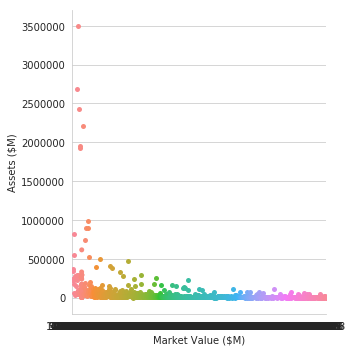

In [37]:
sns.catplot(x="Market Value ($M)", y="Assets ($M)",kind='swarm', data=df[df["Year"]==2020], aspect=1);

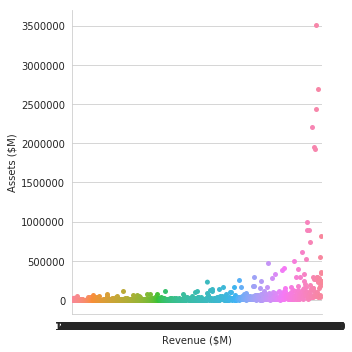

In [39]:
sns.catplot(x="Revenue ($M)", y="Assets ($M)",kind='swarm', data=df[df["Year"]==2020], aspect=1);

In [17]:
df.description()

NameError: name 'df' is not defined